In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
file_path="/Users/anishjain/Downloads/AirPassengers.csv"
df=pd.read_csv(file_path)  # read the data set
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [19]:
print(df.tail())  # ending 5 rows
print(df.size)    # size
print(df.shape)   # no of rows and columns

print(df.describe())  #  describe the columns 
print(df.columns)


print(df.isnull().sum()) # checking a null values 


       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432
288
(144, 2)
       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000
Index(['Month', '#Passengers'], dtype='object')
Month          0
#Passengers    0
dtype: int64


In [20]:
#  to convert the month cloumn in datetime format 
from datetime import datetime 
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
df1=df.set_index(['Month'])
print(df1.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


/var/folders/pj/bb0blhm15x7dw5v23gt3sxvc0000gn/T/ipykernel_6718/3615151407.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)


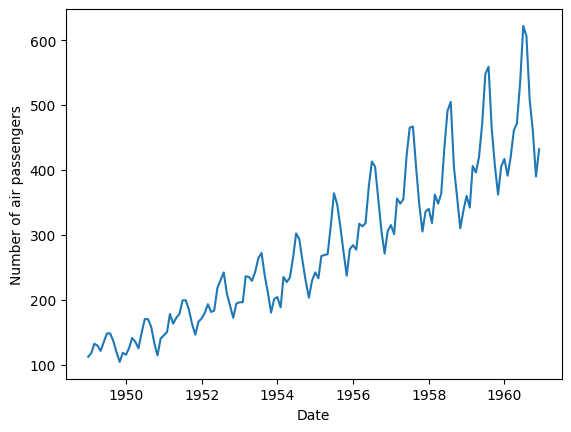

In [21]:
#ploting a graph
# ploting a graph of date and number of passengers
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df1)
plt.show()

In [22]:
# Identifying trends in noisy time series data.
# Detecting seasonality by comparing the rolling mean with the actual data.
# Monitoring changes in volatility over time.
# Detecting periods of high or low stability.


rolmean=df1.rolling(window=12).mean()
rolstd=df1.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


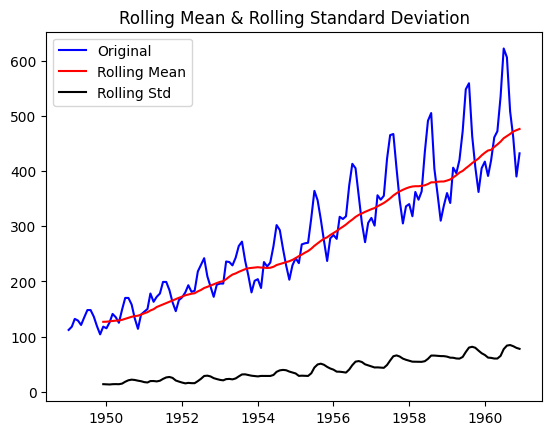

In [23]:
# ploting rolling 

orig=plt.plot(df1,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label="Rolling Mean")
std=plt.plot(rolstd,color='black',label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Rolling Standard Deviation")
plt.show()

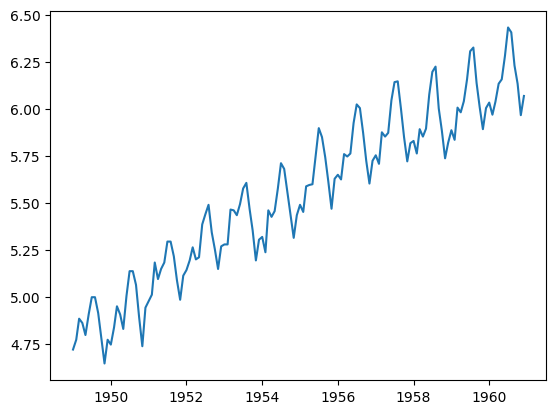

In [24]:
# estimating trend 
# Many time series models require the mean and variance to be constant over time (stationarity). Log transformation is a step toward achieving this.

df_logscale=np.log(df1)
plt.plot(df_logscale)
plt.show()

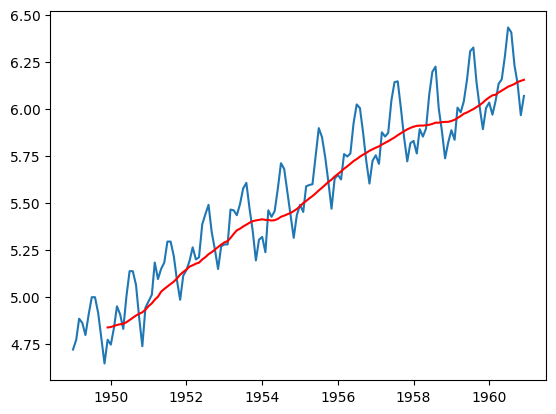

In [25]:
# moving average : in time series modeling, moving averages are used to remove trends and make the data stationary.
movingAverage = df_logscale.rolling(window=12).mean()
movingSTD = df_logscale.rolling(window=12).std()
plt.plot(df_logscale)
plt.plot(movingAverage,color='red')
plt.show()

In [27]:
datasetlogsczleMinusMovingaverage=df_logscale-movingAverage
print(datasetlogsczleMinusMovingaverage.head(12))

# removing nan values
datasetlogsczleMinusMovingaverage.dropna(inplace=True)
print(datasetlogsczleMinusMovingaverage.head(12))



            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    -0.065494
            #Passengers
Month                  
1949-12-01    -0.065494
1950-01-01    -0.093449
1950-02-01    -0.007566
1950-03-01     0.099416
1950-04-01     0.052142
1950-05-01    -0.027529
1950-06-01     0.139881
1950-07-01     0.260184
1950-08-01     0.248635
1950-09-01     0.162937
1950-10-01    -0.018578
1950-11-01    -0.180379


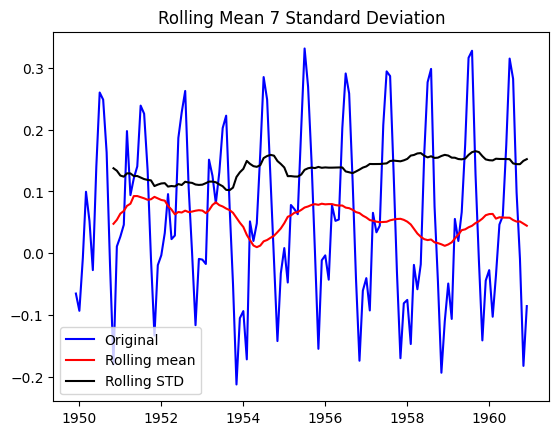

Test Statistic                  -3.162908
p-value                          0.022235
#lags Used                      13.000000
Number of observations Used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [28]:
# determing rolling statistic
# to check time is stationay or not 
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(movingAverage,color='red',label='Rolling mean')
    std  = plt.plot(movingSTD,color='black',label='Rolling STD')
    plt.legend(loc='best')
    plt.title("Rolling Mean 7 Standard Deviation")
    plt.show()

    # Dickey fuller test
    

    dftest=adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags Used','Number of observations Used'])
    for key ,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key]=value
    print(dfoutput)
test_stationarity(datasetlogsczleMinusMovingaverage)
# null hypothesis 
# p value is less than 0.5  and Test Statistic  and critical value is approx same 



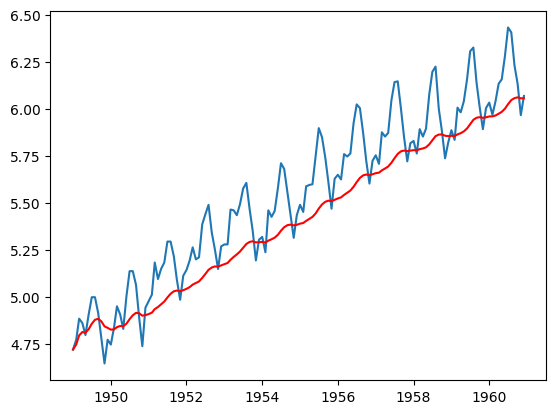

In [29]:
# we need to see the trend that is present inside the time series 

exponentialDecayweightAverage = df_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(df_logscale)
plt.plot(exponentialDecayweightAverage,color='red')
plt.show()
# the trend is going upward 


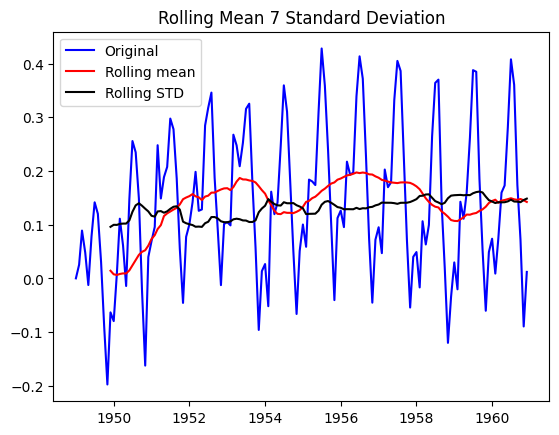

Test Statistic                  -3.601262
p-value                          0.005737
#lags Used                      13.000000
Number of observations Used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [32]:
datasetlogscaleminusMovingExpoentialdecayaverage= df_logscale-exponentialDecayweightAverage
test_stationarity(datasetlogscaleminusMovingExpoentialdecayaverage)


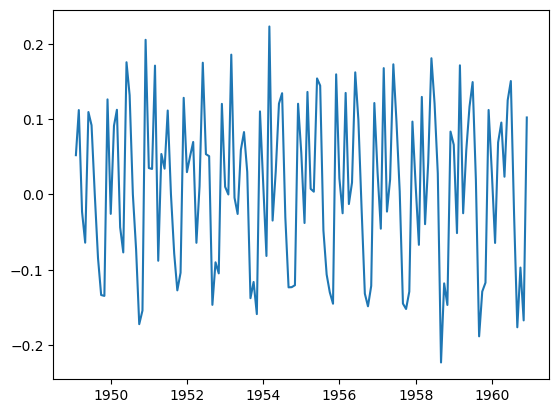

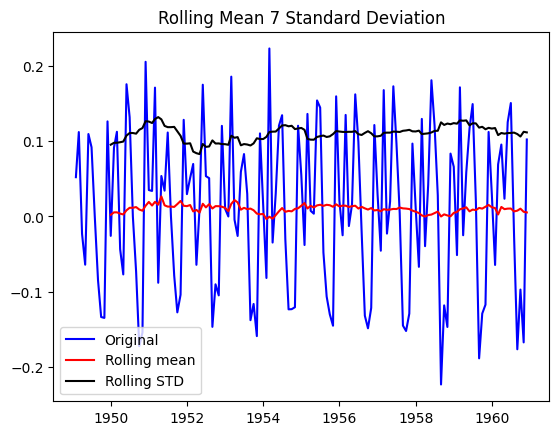

Test Statistic                  -2.717131
p-value                          0.071121
#lags Used                      14.000000
Number of observations Used    128.000000
Critical value (1%)             -3.482501
Critical value (5%)             -2.884398
Critical value (10%)            -2.578960
dtype: float64


In [33]:
datasetlogdiffshifting=df_logscale-df_logscale.shift()
plt.plot(datasetlogdiffshifting)
plt.show()

datasetlogdiffshifting.dropna(inplace=True)
test_stationarity(datasetlogdiffshifting)



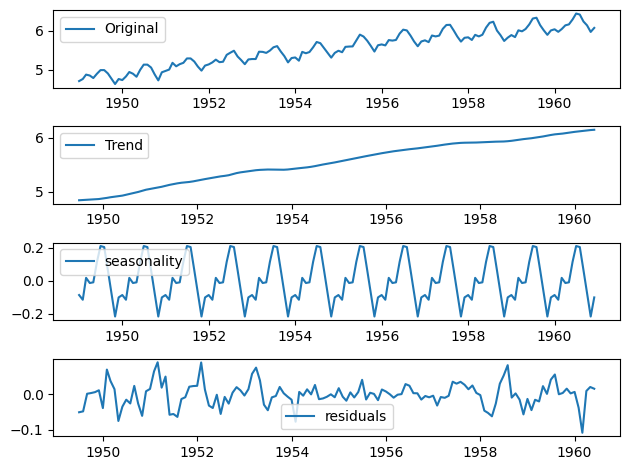

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
deccomposition = seasonal_decompose(df_logscale)

trend =deccomposition.trend
seasonal = deccomposition.seasonal
residual= deccomposition.resid  # it is irregular in nature

plt.subplot(411)
plt.plot(df_logscale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

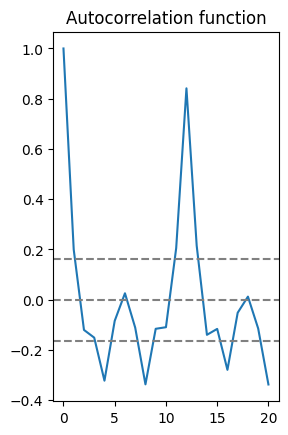

In [45]:
# ACF AND PACF plots  
# we have to find the value of p and q 


from statsmodels.tsa.stattools import acf, pacf
lag_acf=acf(datasetlogdiffshifting,nlags=20)
lag_pacf=pacf(datasetlogdiffshifting,nlags=20,method='ols')


# plot ACF 
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle="--",color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogscaleminusMovingExpoentialdecayaverage)),linestyle="--",color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogscaleminusMovingExpoentialdecayaverage)),linestyle="--",color='gray')
plt.title('Autocorrelation function')
plt.show()


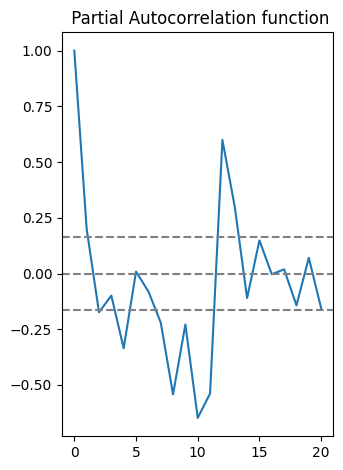

In [46]:
 #plot Pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogscaleminusMovingExpoentialdecayaverage)),linestyle="--",color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogscaleminusMovingExpoentialdecayaverage)),linestyle="--",color='gray')
plt.title(' Partial Autocorrelation function')
plt.tight_layout()
plt.show()


Plotting AR model


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


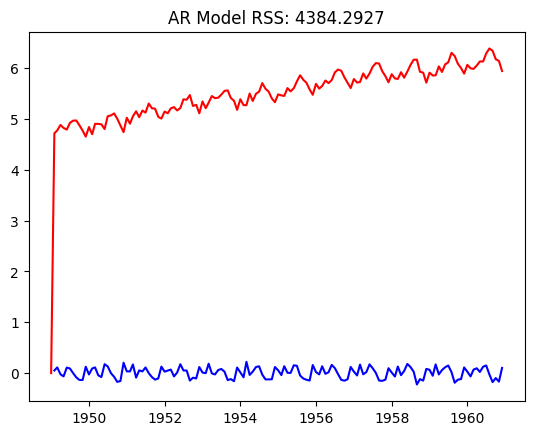

In [54]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_logscale, order = (2,1,2))
results_AR= model.fit()
fitted_values_AR=results_AR.fittedvalues
aligned_actual_AR = datasetlogdiffshifting["#Passengers"].reindex(fitted_values_AR.index).dropna()

# Calculate RSS for AR model
rss_AR = np.sum((aligned_actual_AR - fitted_values_AR)**2)
plt.plot(datasetlogdiffshifting,color="blue")
plt.plot(fitted_values_AR,color='red')
plt.title(f"AR Model RSS: {rss_AR:.4f}")
print("Plotting AR model")

plt.show()


Plotting MA model


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


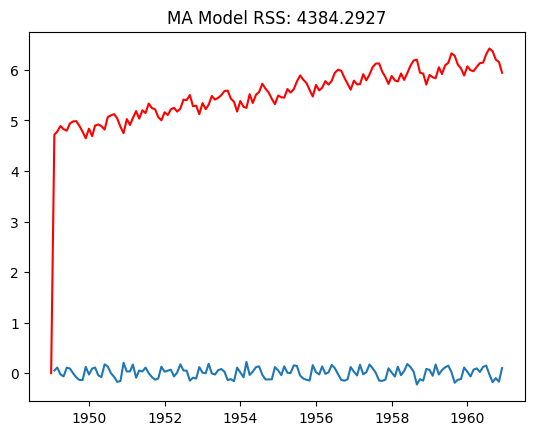

In [55]:
# MA Model
model = ARIMA(df_logscale,order = (0,1,2))
results_MA= model.fit()
fitted_values_MA = results_MA.fittedvalues
aligned_actual_MA = datasetlogdiffshifting["#Passengers"].reindex(fitted_values_MA.index).dropna()

# Calculate RSS for MA model
rss_MA = np.sum((aligned_actual_AR - fitted_values_AR)**2)
plt.plot(datasetlogdiffshifting)
plt.plot(fitted_values_MA ,color='red')
plt.title(f"MA Model RSS: {rss_MA:.4f}")
print("Plotting MA model")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


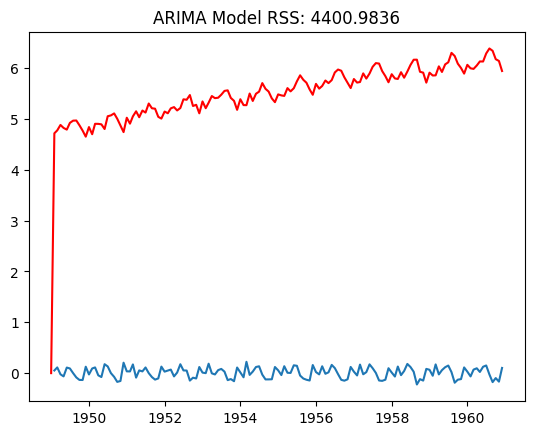

In [56]:
# ARIMA Model
model = ARIMA(df_logscale,order = (2,1,2))
results_ARIMA= model.fit()
fitted_values_ARIMA = results_ARIMA.fittedvalues
aligned_actual_ARIMA = datasetlogdiffshifting["#Passengers"].reindex(fitted_values_ARIMA.index).dropna()

# Calculate RSS for MA model
rss_MA = np.sum((aligned_actual_MA - fitted_values_MA)**2)

plt.plot(datasetlogdiffshifting)
plt.plot(fitted_values_ARIMA,color='red')
plt.title(f"ARIMA Model RSS: {rss_MA:.4f}")

plt.show()

In [57]:
predictions_ARIMA_diff= pd.Series(fitted_values_ARIMA,copy=True)
print(predictions_ARIMA_diff.head())

# Cumulative sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

predictions_ARIMA_log=pd.Series(df_logscale['#Passengers'].iloc[0],index=df_logscale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print(predictions_ARIMA_log.head())

print(df_logscale)


Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883215
1949-05-01    4.824422
dtype: float64
Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494884
1949-04-01    14.378099
1949-05-01    19.202521
dtype: float64
Month
1949-01-01     4.718499
1949-02-01     9.436998
1949-03-01    14.213382
1949-04-01    19.096598
1949-05-01    23.921020
dtype: float64
            #Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
...                 ...
1960-08-01     6.406880
1960-09-01     6.230481
1960-10-01     6.133398
1960-11-01     5.966147
1960-12-01     6.068426

[144 rows x 1 columns]


In [59]:
x=results_ARIMA.forecast(steps=120) # print the predictaed values of next ten years 
print(x)
forecasted_log_values = x
forecasted_original_values = np.exp(forecasted_log_values)

forecasted_original_values_int = np.round(forecasted_original_values).astype(int)
print("Predicted values (as integers):", forecasted_original_values_int)

1961-01-01    6.157564
1961-02-01    6.122235
1961-03-01    6.137508
1961-04-01    6.131764
1961-05-01    6.134456
                ...   
1970-08-01    6.134124
1970-09-01    6.134124
1970-10-01    6.134124
1970-11-01    6.134124
1970-12-01    6.134124
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64
Predicted values (as integers): 1961-01-01    472
1961-02-01    456
1961-03-01    463
1961-04-01    460
1961-05-01    461
             ... 
1970-08-01    461
1970-09-01    461
1970-10-01    461
1970-11-01    461
1970-12-01    461
Freq: MS, Name: predicted_mean, Length: 120, dtype: int64


In [60]:
#predictions_ARIMA = predictions_ARIMA.reindex(df1.index) 
# If log values are negative or too extreme, clip them to avoid issues
predictions_ARIMA_log = np.clip(predictions_ARIMA_log, -700, 700)

# Now apply np.exp() to recover the original data

predictions_ARIMA = np.exp(predictions_ARIMA_log)

# Ensure indices are in datetime format
df1.index = pd.to_datetime(df1.index)
predictions_ARIMA.index = pd.to_datetime(predictions_ARIMA.index)

# Align the data and predictions by index
predictions_ARIMA = predictions_ARIMA.reindex(df1.index, method='ffill')


# Reindex predictions to align with original data
#predictions_ARIMA = predictions_ARIMA.reindex(df1.index)

# Drop NaN values if any
#predictions_ARIMA = predictions_ARIMA.dropna()




# Check for Inf or NaN values in both df1 and predictions_ARIMA
print(np.any(np.isinf(df1)))
print(np.any(np.isinf(predictions_ARIMA_log)))

print(np.any(np.isnan(df1)))
print(np.any(np.isnan(predictions_ARIMA)))
print(np.any(np.isinf(predictions_ARIMA)))


predictions_ARIMA.replace([np.inf, -np.inf], np.nan, inplace=True)
print(np.any(np.isinf(predictions_ARIMA)))




False
False
False
False
False
False


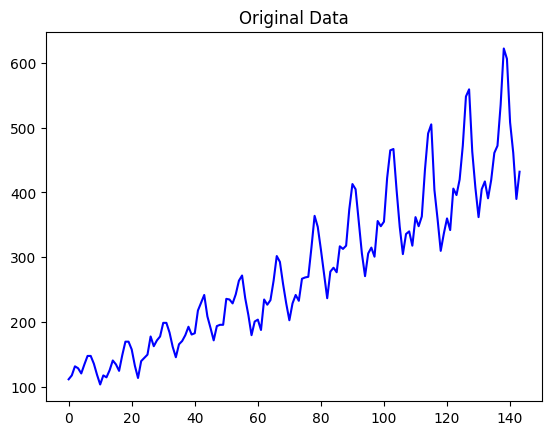

In [61]:

# ploting the original data 
plt.plot(df1.values,color="blue")
plt.title("Original Data")
plt.show()


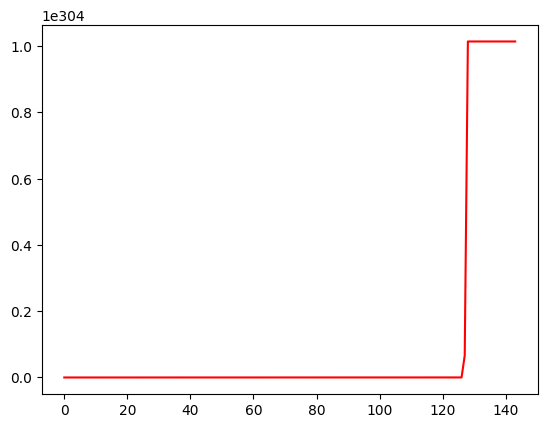

In [62]:
# ploting the predications 
plt.plot(predictions_ARIMA.values,color="red")
plt.show()

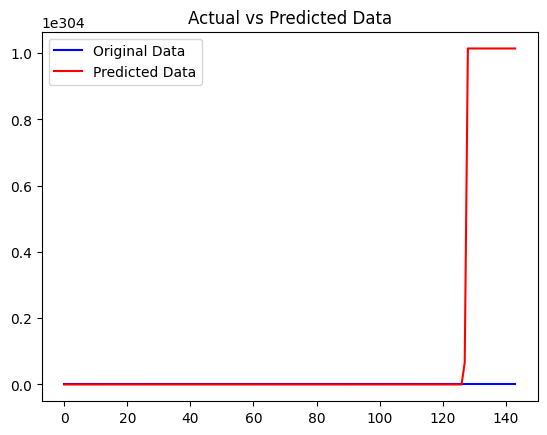

In [26]:
#ploting the graph 
plt.plot(df1.values, color="blue", label="Original Data")
plt.plot(predictions_ARIMA.values, color="red", label="Predicted Data")
plt.legend()
plt.title('Actual vs Predicted Data')
plt.show()
